## 웹 스크래핑 실습 및 csv 파일 작성과 이미지 스크래핑

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError
import pandas as pd

In [7]:
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'

try:
    html = urlopen(url)
except HTTPError as he : 
    print('http error')
except URLError as ue : 
    print('url error')
else :
    print('정상 작동 중~')

정상 작동 중~


In [8]:
soup = BeautifulSoup(html.read(), 'html.parser', from_encoding='utf-8')

- 점수(별점), 리뷰 제목, 작성자 닉네임, 작성날짜, 리뷰내용

In [97]:
review_list = soup.find_all('div', {'class' : 'imdb-user-review'})
review_list[0]
print(len(review_list))

25


In [100]:
soup.find_all('span', 'rating-other-user-rating')[1].span.string

'10'

In [108]:
soup.find_all('div', 'lister-item-content')[0].a.string

' Great\n'

In [93]:
soup.find_all('span', 'display-name-link')[0].a.string

'MR_Heraclius'

In [96]:
soup.find_all('span','review-date')[0].string

'23 February 2020'

In [76]:
soup.find_all('div', 'text show-more__control')[0].string

'This movie portrays a villain that by far has been the best out of all the other Marvel antagonists. It shows his personal conflicts, his purpose, as well as his cruelty. The heroes of this film are overshadowed by this, but the ending really makes a mark on the audience.'

In [115]:
data = []
score = []
title = []
writer = []
date = []
content= []
for i in range(0,len(review_list)):
    score.append(soup.find_all('span', 'rating-other-user-rating')[i].span.string)
    title.append(soup.find_all('div', 'lister-item-content')[i].a.string.replace('\n',''))
    writer.append(soup.find_all('span', 'display-name-link')[i].a.string)
    date.append(soup.find_all('span','review-date')[i].string)
    content.append(soup.find_all('div', 'text show-more__control')[i].string)

### =================================

### 자연어 처리 기초  
- 꼬고마 엔진  
- 한나눔 엔진  
- 트위터 엔진  

In [22]:
from konlpy.tag import Kkma

In [23]:
kkoma = Kkma()

In [28]:
kkoma.nouns('한국어 문장 분석을 시작합니다. 재미있어요~')

['한국어', '문장', '분석']

In [27]:
kkoma.sentences('한국어 문장 분석을 시작합니다. 재미있어요~')

['한국어 문장 분석을 시작합니다.', '재미있어요~']

In [29]:
kkoma.pos('한국어 문장 분석을 시작합니다. 재미있어요~')

[('한국어', 'NNG'),
 ('문장', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~', 'SO')]

- 워드클라우드

In [31]:
from wordcloud import WordCloud, STOPWORDS

In [37]:
import numpy as np
from PIL import Image

In [38]:
text = open('./data/07. alice.txt').read()

In [39]:
text

'癤풮roject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what i

In [40]:
alice_mask = np.array(Image.open('./images/07. alice_mask.png'))

In [41]:
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

### 앨리스 그림 모형  

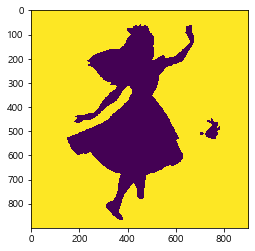

In [48]:
plt.figure(figsize=(4,4))
plt.imshow(alice_mask)

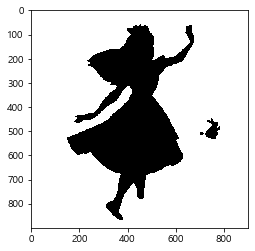

In [49]:
plt.figure(figsize=(4,4))
plt.imshow(alice_mask, cmap=plt.cm.gray)

- 불용어 제거

In [54]:
sw=set(STOPWORDS)
sw.add('said')
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords = sw)

- 단어의 빈도 확인하기

In [56]:
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11475

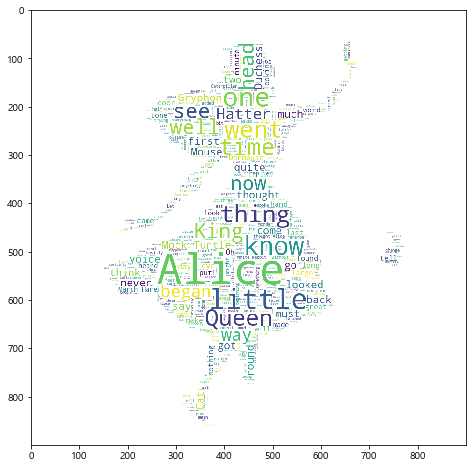

In [58]:
plt.figure(figsize=(8,8))
plt.imshow(wc, cmap=plt.cm.gray)

### =================================

- 점수(별점), 리뷰제목, 작성자 닉네임, 작성날짜, 리뷰내용  
- 감정분석(VADER) - NLTK에 내장되어있는 함수  
- good +0.1, awful -0.1, perfect +0.2로 가정    
- 문장에서 저런 단어가 추출되면 나올 때마다 점수를 더하고 빼서 최종 점수가 양수가 긍정, 음수면 부정으로 평가 해보자

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hyesu\AppData\Roaming\nltk_data...


True

In [66]:
sid = SentimentIntensityAnalyzer()

In [123]:
data = []

#워드클라우드 사용할 때 쓸 모든 리뷰 텍스트를 합친 문자열
sum_review = ''
for review in review_list:
    score = review.find('span').get_text().replace('\n','')
    title = review.find('a').get_text().replace('\n','')
    writer = review.find('span', {'class': 'display-name-link'}).get_text()
    date = review.find('span', {'class' : 'review-date'}).get_text()
    content = review.find('div', {'class' : 'text show-more__control'}).get_text()
    
    sum_review = sum_review + content
    
    # 전처리 텍스트를 문장별로
    lines_list = tokenize.sent_tokenize(content)
    sum = 0
    
    # polarity_scores() : 문장을 단어별로 분석해서 긍정, 부정, 중립에 대한 점수를 계산해주고 종합 점수 [compound]를 반환
    for sent in lines_list:
        ss = sid.polarity_scores(sent)
        sum = sum + ss['compound']
    sum1 = str(sum/len(lines_list))
    
    data.append([score, title, writer,date, content, sum1])



In [129]:
data[0]

['9/10',
 ' Great',
 'MR_Heraclius',
 '23 February 2020',
 'This movie portrays a villain that by far has been the best out of all the other Marvel antagonists. It shows his personal conflicts, his purpose, as well as his cruelty. The heroes of this film are overshadowed by this, but the ending really makes a mark on the audience.',
 '-0.06573333333333331']

In [127]:
with open('./data/service_imdb_wordcloud.csv', 'w', encoding='utf-8') as file:
    file.write('score, title, writer, date, content, sum \n')
    
    # data를 반복해서 저장
    for idx in data:
        file.write("{},{},{},{},{},{} \n".format(idx[0],idx[1],idx[2],idx[3],idx[4],idx[5]))

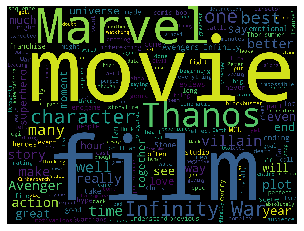

In [130]:
wordcloud = WordCloud(width=2400, height=1800, stopwords=set(STOPWORDS)).generate(sum_review)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()